# Demo1: Simple Harmonic Oscillator

In this jupyter notebook, we will learn how to use the Euler's method to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
x^{t^{n+1}} = x^{t^n} + v^{t^n} \times \Delta t,
$$
and 
$$
v^{t^{n+1}} = v^{t^n} + a^{t^n} \times \Delta t.
$$

### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: 
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the Euler method
#

# Step 1: set up the parameters of the problem
A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.01

# Step 2: set up the time and solution arrays
N = 1000
time = np.zeros(N)
x = np.zeros(N)
v = np.zeros(N)
a = np.zeros(N)

# Step 3: set up the initial conditions
x[0] = A
v[0] = 0

# Step 4: solve the difference equation using the Euler method
for i in range(1,N):
    time[i] = time[i-1] + dt
    a[i] = -k*x[i-1]/m 
    v[i] = v[i-1] + a[i]*dt
    x[i] = x[i-1] + v[i]*dt

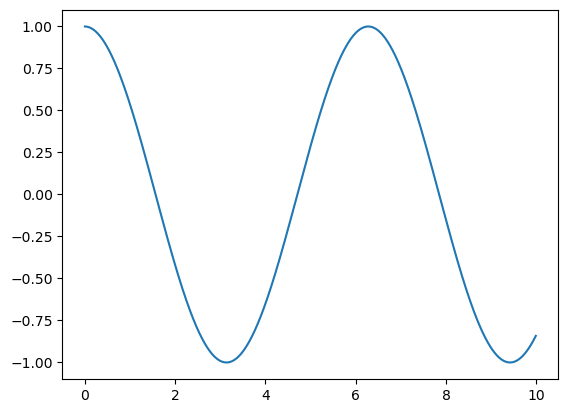

In [8]:
# Step 5: plot the solution
plt.plot(time,x)

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

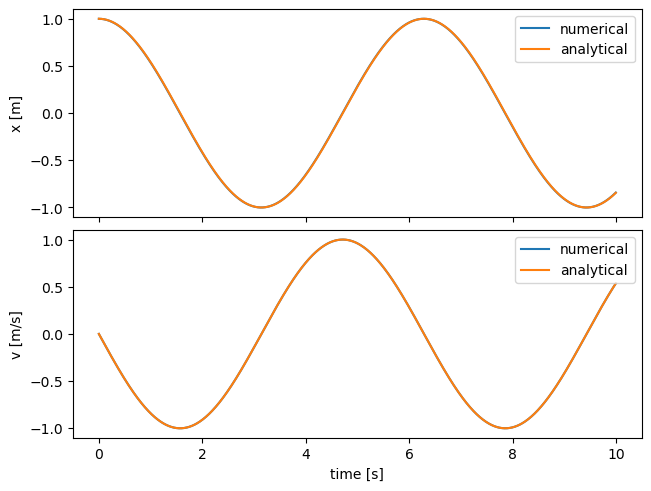

In [10]:
# Step 6: evaluate the analytical solution and plot it
x_ana = A*np.cos(omega0*time)
v_ana = -A*omega0*np.sin(omega0*time)

fig,axs = plt.subplots(2,1,sharex=True,layout='constrained')
axs[0].plot(time,x,label='numerical')
axs[0].plot(time,x_ana,label='analytical')
axs[0].set_ylabel('x [m]')
axs[0].legend()
axs[1].plot(time,v,label='numerical')
axs[1].plot(time,v_ana,label='analytical')
axs[1].set_ylabel('v [m/s]')
axs[1].set_xlabel('time [s]')
axs[1].legend()
plt.show()

Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

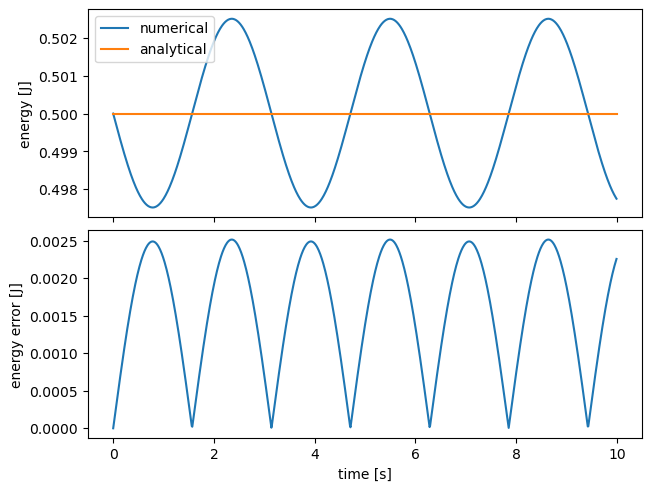

In [13]:
# Step 7: evaluate the energy (error) of the system
energy = 0.5*m*v**2 + 0.5*k*x**2
energy_ana = 0.5*m*v_ana**2 + 0.5*k*x_ana**2
energy_error = np.abs(energy-energy_ana)

fig,axs = plt.subplots(2,1,sharex=True,layout='constrained')
axs[0].plot(time,energy,label='numerical')
axs[0].plot(time,energy_ana,label='analytical')
axs[0].set_ylabel('energy [J]')
axs[0].legend()
axs[1].plot(time,energy_error)
axs[1].set_ylabel('energy error [J]')
axs[1].set_xlabel('time [s]')
plt.show()

In [25]:
# Step 8: evaluate the phase space

# TODO









## Exercise 2: 
Check if the accuracy can be improved by reducing the time step to $\Delta t=0.001$.

In [19]:
# TODO







### Note

Reducing the time step is not the best solution. The better solution is to use higher-order schemes. Do NOT use Eulter's method in any production runs. 